# 1) Exploratory Data Analysis (EDA) and Visualization

### Solution

In [1]:
# Importing data processing and visualization libraries for first part
import pandas as pd
import re
import string
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import random
import time

# Reading file
df = pd.read_csv('resume_dataset.csv')
display(df)

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
957,Testing,Computer Skills: â¢ Proficient in MS office (...
958,Testing,â Willingness to accept the challenges. â ...
959,Testing,"PERSONAL SKILLS â¢ Quick learner, â¢ Eagerne..."
960,Testing,COMPUTER SKILLS & SOFTWARE KNOWLEDGE MS-Power ...


In [2]:
# Showing if has null values
print('Count of null values from category column:', df['Category'].isnull().sum())
print('Count of null values from resume column:', df['Resume'].isnull().sum(), '\n')

# Data information
print(df.info(), '\n')

# A dinamic statistic
print(df.describe())

Count of null values from category column: 0
Count of null values from resume column: 0 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  962 non-null    object
 1   Resume    962 non-null    object
dtypes: object(2)
memory usage: 15.2+ KB
None 

              Category                                             Resume
count              962                                                962
unique              25                                                166
top     Java Developer  Technical Skills Web Technologies: Angular JS,...
freq                84                                                 18


#### Category column

##### Exploration and processing I

In [3]:
# Starting with category column
df['Category'].value_counts()

Category
Java Developer               84
Testing                      70
DevOps Engineer              55
Python Developer             48
Web Designing                45
HR                           44
Hadoop                       42
Sales                        40
Data Science                 40
Mechanical Engineer          40
ETL Developer                40
Blockchain                   40
Operations Manager           40
Arts                         36
Database                     33
Health and fitness           30
PMO                          30
Electrical Engineering       30
Business Analyst             28
DotNet Developer             28
Automation Testing           26
Network Security Engineer    25
Civil Engineer               24
SAP Developer                24
Advocate                     20
Name: count, dtype: int64

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


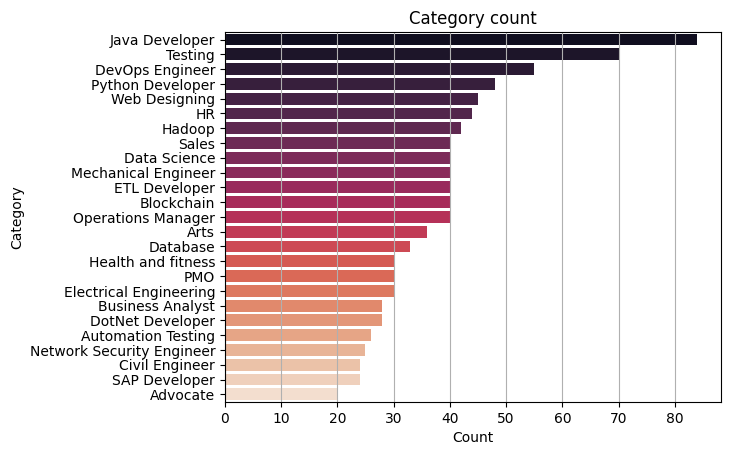

In [4]:
# Bar plot was made to see better numbers above
x_barplot = df['Category'].value_counts().to_list()
y_barplot = df['Category'].value_counts().index.to_list()

barplot_amount_values = sns.barplot(x=x_barplot,
                                    y=y_barplot,
                                    palette="rocket") # Color: https://seaborn.pydata.org/tutorial/color_palettes.html

plt.title('Category count')
plt.xlabel('Count')
plt.ylabel('Category')
plt.grid(True, 'major', 'x')
plt.show()

In [5]:
# Getting job that are tech area
list_tech = ['Java Developer', 'Testing', 'DevOps Engineer', 'Python Developer',
             'Web Designing', 'ETL Developer', 'Data Science', 'SAP Developer',
             'Network Security Engineer', 'Automation Testing', 'DotNet Developer',
             'Hadoop', 'Database', 'Blockchain']

# Created a new column called 'Category Area', that identify if resume does part from certain category
df['Category Area'] = None
df['Category Area'] = df['Category'].apply(lambda category: 'Tech' if category in list_tech else 'Others')

# Sorting columns
df = df.reindex(columns=['Category', 'Category Area', 'Resume'])
df.head()

,Category,Category Area,Resume
0,Data Science,Tech,Skills * Programming Languages: Python (pandas...
1,Data Science,Tech,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,Tech,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,Tech,"Education Details \r\n MCA YMCAUST, Faridab..."


In [6]:
# Visualization of new columns
fig = px.pie(df, names='Category Area', title='Data distribution',
             color_discrete_sequence=px.colors.qualitative.G10) # Color: https://plotly.com/python/discrete-color/

fig.update_layout(height=400, width=400)
fig.show()

In [7]:
# Here was made a visualization more deeper, to see distribution of category area (tech or others)
df_1 = df[df['Category Area'] == 'Tech']
df_2 = df[df['Category Area'] == 'Others']

fig_1 = px.pie(df_1, names='Category', title='Tech category distribution',
               color_discrete_sequence=px.colors.qualitative.D3) # Color: https://plotly.com/python/discrete-color/

fig_2 = px.pie(df_2, names='Category', title='Others category distribution',
               color_discrete_sequence=px.colors.qualitative.D3)

fig_1.show()
print('')
fig_2.show()

#### Resume column

##### Exploration I

In [8]:
# Here we can see that resumes are duplicates
len_df = len(df)
len_df_resume_uni = len(df['Resume'].unique())
porc_no_duplicate = round(len_df_resume_uni/len_df, 2)

print(len_df, 'is the lenght of lines')
print(len_df_resume_uni, 'are uniques')
print(f'{porc_no_duplicate}% of data aren´t duplicates \n')

# The text has invalid char, then these invalid char can be present in others datas
df['Resume'][3]

962 is the lenght of lines
166 are uniques
0.17% of data aren´t duplicates 



"Skills â\x80¢ R â\x80¢ Python â\x80¢ SAP HANA â\x80¢ Tableau â\x80¢ SAP HANA SQL â\x80¢ SAP HANA PAL â\x80¢ MS SQL â\x80¢ SAP Lumira â\x80¢ C# â\x80¢ Linear Programming â\x80¢ Data Modelling â\x80¢ Advance Analytics â\x80¢ SCM Analytics â\x80¢ Retail Analytics â\x80¢Social Media Analytics â\x80¢ NLP Education Details \r\nJanuary 2017 to January 2018 PGDM Business Analytics  Great Lakes Institute of Management & Illinois Institute of Technology\r\nJanuary 2013 Bachelor of Engineering Electronics and Communication Bengaluru, Karnataka New Horizon College of Engineering, Bangalore Visvesvaraya Technological University\r\nData Science Consultant \r\n\r\nConsultant - Deloitte USI\r\nSkill Details \r\nLINEAR PROGRAMMING- Exprience - 6 months\r\nRETAIL- Exprience - 6 months\r\nRETAIL MARKETING- Exprience - 6 months\r\nSCM- Exprience - 6 months\r\nSQL- Exprience - Less than 1 year months\r\nDeep Learning- Exprience - Less than 1 year months\r\nMachine learning- Exprience - Less than 1 year mo

In [9]:
# Insert this method to clear output when have finished
from IPython.display import clear_output

# Getting unique resumes
unique_resume = df['Resume'].unique().tolist()

# Here it was done an exploration of resume, to find invalid chars
def resume_exp(unique_resume):
  num = 0
  for resume in unique_resume:
      print(num)
      print(resume)
      time.sleep(0.5) # Inserted this line, to try fix a error, basically sometimes output not appear

      inp = input()
      if inp == '':
          clear_output()
          num += 1
      else:
          clear_output()
          break

# Commented to not execute, uncomment to execute function
# resume_exp(unique_resume) # Insert any char to stop loop and press enter to continue

##### Processing I

In [10]:
# Invalid char collected, to take off
invalid_char = ['â¢', 'âª', 'â', 'ï', 'ï', 'ï·',
                'Â', 'Ã¼', 'Ã¼Â', 'Ã±', 'ÃÂ', '·', '*'] # '   ' whitespace

# This text below commeted, was my first attempt used in clean_resume function, however i found a best way such as '^\x00-\x7f]'
''' text = re.sub('â¢', ' ', text)
    text = re.sub('âª', ' ', text)
    text = re.sub('â', ' ', text)
    text = re.sub('Â', ' ', text)
    text = re.sub('Ã¼', ' ', text)
    text = re.sub('Ã¼Â', ' ', text)
    text = re.sub('Ã±', ' ', text)
    text = re.sub('ÃÂ', ' ', text)
    text = re.sub('ï', ' ', text)
    text = re.sub('ï', ' ', text)
    text = re.sub('ï·', ' ', text)'''

# Taking off invalid chars from resume
def clean_resume(text):
    text = re.sub('[^\x00-\x7f]', ' ', text) # https://stackoverflow.com/questions/20889996/how-do-i-remove-all-non-ascii-characters-with-regex-and-notepad no ascii
    text = re.sub('\r', ' ', text)
    text = re.sub('\n', ' ', text)
    text = re.sub('\s+', ' ', text) # Remove whitespace
    text = re.sub(('[%s]' % re.escape(string.punctuation)), ' ', text) # https://medium.com/geekculture/how-to-remove-punctuation-from-text-in-python-7c8790bac4bd
    return text

df['Processed Resume'] = df['Resume'].apply(lambda x: clean_resume(x))

##### Verification I

In [11]:
# Here we got random numbers to verify random samples of resumes, to see if processing is correct
for _ in range(10):
  print(random.randint(0, len(df)))

245
330
693
777
69
791
547
817
156
868


In [12]:
random_number = 580
df['Resume'][random_number]

'â\x80¢ Operating Systems: Windows â\x80¢ Others: MS Excel, MS Office, MS Power Point Key Projects Handled Project Title: fruit sorting and disease detection Client: Kranti Dynamics Team Size: 5 Education Details \r\nJanuary 2014 B.E. Electronics Mumbai, Maharashtra University of Mumbai\r\nPython Developer/analyst \r\n\r\npython developer and data analyst\r\nSkill Details \r\npython scripting,programming,developing- Exprience - 12 months\r\nfrontend  ,html- Exprience - 12 months\r\npython liabrary, numpy,pandas,matplolib,requests,beautiful soap- Exprience - 12 months\r\nmysql- Exprience - 12 months\r\ndjango- Exprience - 12 months\r\nweb scrapping- Exprience - Less than 1 year monthsCompany Details \r\ncompany - Ace The Power of 5\r\ndescription - The Accountabilities:\r\n\r\nâ\x86\x92 Understanding the functional requirements of the application given by the client.\r\n\r\nâ\x86\x92 Participated in walkthroughs of business requirements, functional requirements and technical design to e

In [13]:
df['Processed Resume'][random_number]

' Operating Systems  Windows Others  MS Excel  MS Office  MS Power Point Key Projects Handled Project Title  fruit sorting and disease detection Client  Kranti Dynamics Team Size  5 Education Details January 2014 B E  Electronics Mumbai  Maharashtra University of Mumbai Python Developer analyst python developer and data analyst Skill Details python scripting programming developing  Exprience   12 months frontend  html  Exprience   12 months python liabrary  numpy pandas matplolib requests beautiful soap  Exprience   12 months mysql  Exprience   12 months django  Exprience   12 months web scrapping  Exprience   Less than 1 year monthsCompany Details company   Ace The Power of 5 description   The Accountabilities  Understanding the functional requirements of the application given by the client  Participated in walkthroughs of business requirements  functional requirements and technical design to ensure their testability  Responsible for Software Configuration Management of project delive

##### Exploration II

In [14]:
# Was found a pattern in text, so let´s explore it
num = 0
for i in unique_resume:
  if 'Skill Details' in i:
    num += 1

print(num, '\n')
df['Processed Resume'][3]

166 



'Skills R Python SAP HANA Tableau SAP HANA SQL SAP HANA PAL MS SQL SAP Lumira C  Linear Programming Data Modelling Advance Analytics SCM Analytics Retail Analytics Social Media Analytics NLP Education Details January 2017 to January 2018 PGDM Business Analytics Great Lakes Institute of Management   Illinois Institute of Technology January 2013 Bachelor of Engineering Electronics and Communication Bengaluru  Karnataka New Horizon College of Engineering  Bangalore Visvesvaraya Technological University Data Science Consultant Consultant   Deloitte USI Skill Details LINEAR PROGRAMMING  Exprience   6 months RETAIL  Exprience   6 months RETAIL MARKETING  Exprience   6 months SCM  Exprience   6 months SQL  Exprience   Less than 1 year months Deep Learning  Exprience   Less than 1 year months Machine learning  Exprience   Less than 1 year months Python  Exprience   Less than 1 year months R  Exprience   Less than 1 year monthsCompany Details company   Deloitte USI description   The project inv

##### Processing II

In [15]:
# It was realized that all resumes have the text 'Skill Details'
# Above this text 'Skill Details' in any resume has education and current job person
# Below has all experience person
# Basically the cells bellow will get these texts ('Experience', 'Current Job', 'Education')

df['Experience'] = df['Processed Resume'].apply(lambda x: (x.split("Skill Details", 1)[1]))

df['Current Job'] = None
df['Education'] = None

for i in range(0, len(df)):
  educ_and_job = df['Resume'].iloc[i].split('Skill Details', 1)[0]
  educ_and_job_lines = educ_and_job.split('\n')

  df.loc[i, 'Current Job'] = clean_resume('\n'.join(educ_and_job_lines[-4:]))
  df.loc[i, 'Education'] = clean_resume('\n'.join(educ_and_job_lines[:-4]))

##### Verification II

In [16]:
# Here we got random numbers to verify random samples of resumes, to see if processing was correted
for _ in range(10):
  print(random.randint(0, len(df)))

565
482
467
425
666
335
311
509
831
817


In [17]:
random_number = 509
print(df['Education'][random_number],'\n')
print(df['Current Job'][random_number], '\n')
print(df['Experience'][random_number])

Education Details July 2016 to May 2019 BE Electrical And Electronics Engineering Bhopal  Madhya Pradesh RGPV July 2012 to May 2015 Diploma in Electrical Electrical Engineering Bhopal  Madhya Pradesh Rgpv university Bhopal Matric GHS BHULI  

Electrical Engineering  

 Basic Computer  Electrical Machine  Electrical wiring  Solar power Plant  Distribution Substation  Exprience   Less than 1 year monthsCompany Details company   Enigma Business Advisor description   Solar Energy 1  Solar power plant Installation 2  Maintenance Transmission and Distribution Line 1  Installation


#### More exploration and processing

In [18]:
# Verify if current job does part from category
list_1 = []
list_2 = []

for i in range(0, len(df)):
  df.loc[i, 'Category'] = df.loc[i, 'Category'].upper()
  df.loc[i, 'Current Job'] = df.loc[i, 'Current Job'].upper()

  if df.loc[i, 'Category'] in df.loc[i, 'Current Job']:
    list_1.append(f"{df.loc[i, 'Category']}, {df.loc[i, 'Current Job']}")
  else:
    list_2.append(f"{df.loc[i, 'Category']}, {df.loc[i, 'Current Job']}")

print(len(set(list(list_1)))) # list_1 or list_2

# Was realized that have 149 current jobs that does part from category
# But the others ones?
# It was realize that the rest was been part, but written with other form
# Like ("Category: DATA SCIENCE", "Current Job: Data scientist")
# It´s the same thing, but written with other form

100


In [19]:
df.head()

,Category,Category Area,Resume,Processed Resume,Experience,Current Job,Education
0,DATA SCIENCE,Tech,Skills * Programming Languages: Python (pandas...,Skills Programming Languages Python pandas...,JAVASCRIPT Exprience 24 months jQuery Exp...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,Skills Programming Languages Python pandas...
1,DATA SCIENCE,Tech,Education Details \r\nMay 2013 to May 2017 B.E...,Education Details May 2013 to May 2017 B E UIT...,Python Exprience Less than 1 year months S...,DATA SCIENTIST DATA SCIENTIST MATELABS,Education Details May 2013 to May 2017 B E UIT...
2,DATA SCIENCE,Tech,"Areas of Interest Deep Learning, Control Syste...",Areas of Interest Deep Learning Control Syste...,Data Analysis Exprience Less than 1 year m...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Areas of Interest Deep Learning Control Syste...
3,DATA SCIENCE,Tech,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,LINEAR PROGRAMMING Exprience 6 months RETA...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,Skills R Python SAP HANA Tableau SAP HANA SQL ...
4,DATA SCIENCE,Tech,"Education Details \r\n MCA YMCAUST, Faridab...",Education Details MCA YMCAUST Faridabad Hary...,Data Structure Exprience Less than 1 year ...,DATA SCIENCE INTERNSHIP,Education Details MCA YMCAUST Faridabad Hary...


In [20]:
# Merging all into same column
# So it´s necessary create a new column
df['Final Resume'] = None

for i in range(0, len(df)):
  text_1 = f"Education: {df.loc[i, 'Education']} / "
  text_2 = f"Current Job: {df.loc[i, 'Current Job']} / "
  text_3 = f"Experience: {df.loc[i, 'Experience']}"

  df.loc[i, 'Final Resume'] = ' '.join([text_1, text_2, text_3])

# Dropping 'resume' and 'processed resume' columns, because aren´t more necessary
df = df.drop(['Resume', 'Processed Resume'], axis=1)
# Sorting values for a better visualization
df = df.reindex(columns=['Category', 'Category Area', 'Final Resume',
                         'Education', 'Current Job', 'Experience'])

display(df.head())
print('\n')
df['Final Resume'][0]

,Category,Category Area,Final Resume,Education,Current Job,Experience
0,DATA SCIENCE,Tech,Education: Skills Programming Languages Pyt...,Skills Programming Languages Python pandas...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,JAVASCRIPT Exprience 24 months jQuery Exp...
1,DATA SCIENCE,Tech,Education: Education Details May 2013 to May 2...,Education Details May 2013 to May 2017 B E UIT...,DATA SCIENTIST DATA SCIENTIST MATELABS,Python Exprience Less than 1 year months S...
2,DATA SCIENCE,Tech,Education: Areas of Interest Deep Learning Co...,Areas of Interest Deep Learning Control Syste...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Data Analysis Exprience Less than 1 year m...
3,DATA SCIENCE,Tech,Education: Skills R Python SAP HANA Tableau SA...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,LINEAR PROGRAMMING Exprience 6 months RETA...
4,DATA SCIENCE,Tech,Education: Education Details MCA YMCAUST Fari...,Education Details MCA YMCAUST Faridabad Hary...,DATA SCIENCE INTERNSHIP,Data Structure Exprience Less than 1 year ...


'Education: Skills   Programming Languages  Python  pandas  numpy  scipy  scikit learn  matplotlib   Sql  Java  JavaScript JQuery    Machine learning  Regression  SVM  Na ve Bayes  KNN  Random Forest  Decision Trees  Boosting techniques  Cluster Analysis  Word Embedding  Sentiment Analysis  Natural Language processing  Dimensionality reduction  Topic Modelling  LDA  NMF   PCA   Neural Nets    Database Visualizations  Mysql  SqlServer  Cassandra  Hbase  ElasticSearch D3 js  DC js  Plotly  kibana  matplotlib  ggplot  Tableau    Others  Regular Expression  HTML  CSS  Angular 6  Logstash  Kafka  Python Flask  Git  Docker  computer vision   Open CV and understanding of Deep learning Education Details  /  Current Job: DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ASSURANCE ASSOCIATE   ERNST   YOUNG LLP  /  Experience:  JAVASCRIPT  Exprience   24 months jQuery  Exprience   24 months Python  Exprience   24 monthsCompany Details company   Ernst   Young LLP description   Fraud Investigations and

### Explain the rationale of decision about techniques and visualizations

To explain the logic i will explain it by topic, I believe it is easier.

1) We start reading the database and soon realize that the dataset is
CV for certain roles, presented in two columns
the first being the category/position and the curriculum assigned to that category.

2) An analysis is done using pandas methods, looking at the types of data,
if there is null data in the columns and taking some interesting ideas such as:

  - The dataset has 962 lines, but the category
and resume columns have respectively 25 and 166 data, considering that the rest is duplicated,
We will soon work with this "little" data, possibly improving processing.

  - Having Java developer appearing frequently and a resume with 18 frequency

3) I decided to start with the first column and do an exploratory analysis, trying to extract more data, insights...
A list of these data and their quantities throughout the dataset was made, for better visualization a bar graph was created.

  - You soon realize that there are more vacancies in the technology area than others.
Therefore, a filter was made among these 25 data, creating a new
column and mapping these categories in the technology area as 'TECH' and the
remaining as 'OTHERS' in their respective categories.

  - Created a pie chart to better distribution vizualitation of the tech area and the others
(Concluding that there were actually more roles/positions/categories in the technology area with 62.4%)

4) More deeper into this part of the technology area, we made a visualization of the distribution of data in the 'TECH' and 'OTHERS' area to try something else... However, nothing relevant was removed/found

5) After having already achieved a good result in the 'Category' column, we moved on to the 'Resume' columns.
Initially we took some samples and we realize that the data in these column have invalid characters, so we need to clean this data.

6) As there were only 166 unique data of this size, a loop was made, going through each of these 166 resumes
and trying to get such as invalid characters, whitespace and storing it in a list initially. Soon after the exploration, a function was created interacting for each resume and applying data processing with 'regex'. This processing was also checked, taking random samples and checking if the cleaning was successful.

7) Patterns were also identified, such as that each resume was divided between education, work/current position
and experience of the person. So i thought it would be interesting to create 3 columns for respective dimensions for possible use with an ML model, something like that... A processing was made on the resumes, using the 'split' method to be able to separate these attributes and assign their respective columns. Verification was made with random samples.

8) Some more analysis was done before moving on to the NLP/ML part. Made a analysis if the current job person
is assigned to the category, realized that a large part is related to the category.
Also to improve the dataset, which initially had 2 columns and now has 8 columns, was take off some columns and sorted rest


Data was well processed in my view, we moved on to the NLP/ML part.

# 2) NLP techniques / Machine Learning approach

#### Solution

In [21]:
# Solution: I made a text classification - classifing if experience is 'Tech' or 'Other'
# First we import the NLP library and yours methods for process text to put into model
import nltk
package_list = ['wordnet', 'punkt', 'stopwords']
for pack in package_list:
  nltk.download(pack)

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [22]:
# Basically i want categorize like this

number = 3 # DATA SCIENCE
print('Experience:', df['Experience'][number])
print('Category Area:', df['Category Area'][number], '\n')

number_1 = 42 # HR
print('Experience:', df['Experience'][number_1])
print('Category Area:', df['Category Area'][number_1])

Experience:  LINEAR PROGRAMMING  Exprience   6 months RETAIL  Exprience   6 months RETAIL MARKETING  Exprience   6 months SCM  Exprience   6 months SQL  Exprience   Less than 1 year months Deep Learning  Exprience   Less than 1 year months Machine learning  Exprience   Less than 1 year months Python  Exprience   Less than 1 year months R  Exprience   Less than 1 year monthsCompany Details company   Deloitte USI description   The project involved analysing historic deals and coming with insights to optimize future deals  Role  Was given raw data  carried out end to end analysis and presented insights to client  Key Responsibilities  Extract data from client systems across geographies  Understand and build reports in tableau  Infer meaningful insights to optimize prices and find out process blockades  Technical Environment  R  Tableau  Industry  Cross Industry Service Area  Cross Industry   Products Project Name  Handwriting recognition Consultant  3 months  The project involved taking h

##### Tokenize and Remove stop words

In [23]:
# Create a list of tokens
def tokenize(text):
  tokens = word_tokenize(text)
  return tokens

tokens = tokenize(df['Experience'][3])

print(tokens)
print(len(tokens))

['LINEAR', 'PROGRAMMING', 'Exprience', '6', 'months', 'RETAIL', 'Exprience', '6', 'months', 'RETAIL', 'MARKETING', 'Exprience', '6', 'months', 'SCM', 'Exprience', '6', 'months', 'SQL', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'Deep', 'Learning', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'Machine', 'learning', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'Python', 'Exprience', 'Less', 'than', '1', 'year', 'months', 'R', 'Exprience', 'Less', 'than', '1', 'year', 'monthsCompany', 'Details', 'company', 'Deloitte', 'USI', 'description', 'The', 'project', 'involved', 'analysing', 'historic', 'deals', 'and', 'coming', 'with', 'insights', 'to', 'optimize', 'future', 'deals', 'Role', 'Was', 'given', 'raw', 'data', 'carried', 'out', 'end', 'to', 'end', 'analysis', 'and', 'presented', 'insights', 'to', 'client', 'Key', 'Responsibilities', 'Extract', 'data', 'from', 'client', 'systems', 'across', 'geographies', 'Understand', 'and', 'build', 'reports', 'in', 'tableau', '

In [24]:
stopwords = set(stopwords.words('english'))

# Remove stop words from list of tokens
def remove_stopwords(tokens):
  token_list = []
  for i in tokens:
      if i.lower() not in stopwords:
        token_list.append(i)
  return token_list

tokens = remove_stopwords(tokens)

print(tokens)
print(len(tokens))

['LINEAR', 'PROGRAMMING', 'Exprience', '6', 'months', 'RETAIL', 'Exprience', '6', 'months', 'RETAIL', 'MARKETING', 'Exprience', '6', 'months', 'SCM', 'Exprience', '6', 'months', 'SQL', 'Exprience', 'Less', '1', 'year', 'months', 'Deep', 'Learning', 'Exprience', 'Less', '1', 'year', 'months', 'Machine', 'learning', 'Exprience', 'Less', '1', 'year', 'months', 'Python', 'Exprience', 'Less', '1', 'year', 'months', 'R', 'Exprience', 'Less', '1', 'year', 'monthsCompany', 'Details', 'company', 'Deloitte', 'USI', 'description', 'project', 'involved', 'analysing', 'historic', 'deals', 'coming', 'insights', 'optimize', 'future', 'deals', 'Role', 'given', 'raw', 'data', 'carried', 'end', 'end', 'analysis', 'presented', 'insights', 'client', 'Key', 'Responsibilities', 'Extract', 'data', 'client', 'systems', 'across', 'geographies', 'Understand', 'build', 'reports', 'tableau', 'Infer', 'meaningful', 'insights', 'optimize', 'prices', 'find', 'process', 'blockades', 'Technical', 'Environment', 'R', '

##### Processing NLTK

In [25]:
# Creating a df copy, working another one to not break main df
df_train = df.copy()
df_train.head()

,Category,Category Area,Final Resume,Education,Current Job,Experience
0,DATA SCIENCE,Tech,Education: Skills Programming Languages Pyt...,Skills Programming Languages Python pandas...,DATA SCIENCE ASSURANCE ASSOCIATE DATA SCIENCE ...,JAVASCRIPT Exprience 24 months jQuery Exp...
1,DATA SCIENCE,Tech,Education: Education Details May 2013 to May 2...,Education Details May 2013 to May 2017 B E UIT...,DATA SCIENTIST DATA SCIENTIST MATELABS,Python Exprience Less than 1 year months S...
2,DATA SCIENCE,Tech,Education: Areas of Interest Deep Learning Co...,Areas of Interest Deep Learning Control Syste...,DATA SCIENCE DATA SCIENCE AND ELECTRICAL ENTHU...,Data Analysis Exprience Less than 1 year m...
3,DATA SCIENCE,Tech,Education: Skills R Python SAP HANA Tableau SA...,Skills R Python SAP HANA Tableau SAP HANA SQL ...,DATA SCIENCE CONSULTANT CONSULTANT DELOITTE ...,LINEAR PROGRAMMING Exprience 6 months RETA...
4,DATA SCIENCE,Tech,Education: Education Details MCA YMCAUST Fari...,Education Details MCA YMCAUST Faridabad Hary...,DATA SCIENCE INTERNSHIP,Data Structure Exprience Less than 1 year ...


In [26]:
# The function below will tokenize resume, remove stop words
# and join each token to tranform in resume again, but now without stop words

def process_nltk(resume):
  tokens = tokenize(resume)
  tokens = remove_stopwords(tokens)
  text = ' '.join(tokens)
  return text

df_train['Experience'] = df_train['Experience'].apply(lambda x: process_nltk(x))

##### Model

In [27]:
# Import modules from scikit learn for create model
from sklearn.feature_extraction.text import CountVectorizer # https://scikit-learn.org/stable/modules/feature_extraction.html
from sklearn.model_selection import train_test_split
# Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score

In [28]:
# Encoding 'Category Area', our indepedent variable (X)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df_train['Experience'].values)

# Encoding 'Category Area', our dependent variable (Y)
df_train['Category encoder'] = df_train['Category Area'].apply(lambda x: 1 if x == 'Tech' else 0)
y = df_train['Category encoder'].values

# Split train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=20)

###### Multinomial Naive Bayes model building

In [29]:
# Multinomial Naive Bayes
model_mnb = MultinomialNB()
model_mnb.fit(X_train, y_train)

y_pred = model_mnb.predict(X_test)
print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))
print('Precision:', round(precision_score(y_test, y_pred), 4))

Accuracy: 0.9827
Precision: 0.9838


In [30]:
# Predict with MNB
# Example for number: DATA SCIENCE(3) AND HR(42)
number = 783

vectorized_data = vectorizer.transform([df['Experience'][number]])
prediction = model_mnb.predict(vectorized_data)

print(df['Experience'][number], '\n')
if prediction[0] == 1:
  print('TECH')
else:
  print('OTHERS')

 Company Details company   PRGX India Private Limited Pune description   Team Size  10  Environment  Hive  Spark  Sqoop  Scala and Flume  Project Description  The bank wanted to help its customers to avail different products of the bank through analyzing their expenditure behavior  The customers spending ranges from online shopping  medical expenses in hospitals  cash transactions  and debit card usage etc  the behavior allows the bank to create an analytical report and based on which the bank used to display the product offers on the customer portal which was built using java  The portal allows the customers to login and see their transactions which they make on a day to day basis  the analytics also help the customers plan their budgets through the budget watch and my financial forecast applications embedded into the portal  The portal used hadoop framework to analyes the data as per the rules and regulations placed by the regulators from the respective countries  The offers and the 

###### KNN model building

In [31]:
# KNN model
model_knn = KNeighborsClassifier(n_neighbors=3)
model_knn.fit(X, y)

y_pred = model_knn.predict(X_test)
print('Accuracy:', round(accuracy_score(y_test, y_pred), 4))
print('Precision:', round(precision_score(y_test, y_pred), 4))

Accuracy: 1.0
Precision: 1.0


In [32]:
# Predict with KNN
# Example for number: DATA SCIENCE(3) AND HR(42)
number = 783

vectorized_data = vectorizer.transform([df['Experience'][number]])
prediction = model_knn.predict(vectorized_data)

print(df['Experience'][number], '\n')
if prediction[0] == 1:
  print('TECH')
else:
  print('OTHERS')

 Company Details company   PRGX India Private Limited Pune description   Team Size  10  Environment  Hive  Spark  Sqoop  Scala and Flume  Project Description  The bank wanted to help its customers to avail different products of the bank through analyzing their expenditure behavior  The customers spending ranges from online shopping  medical expenses in hospitals  cash transactions  and debit card usage etc  the behavior allows the bank to create an analytical report and based on which the bank used to display the product offers on the customer portal which was built using java  The portal allows the customers to login and see their transactions which they make on a day to day basis  the analytics also help the customers plan their budgets through the budget watch and my financial forecast applications embedded into the portal  The portal used hadoop framework to analyes the data as per the rules and regulations placed by the regulators from the respective countries  The offers and the 

### Explain the rationale of NLP techniques/ML models usage and conclusions

To explain the logic i will explain it by topic, i believe it is easier.

1) In NLP and ML approach, we starting tokenizing each resume and take off
stop words from tokens list. it´s an important processing to put text the into a model later.
The first cells was just a test, in function 'process_nltk' it was made all operation.

2) After we have worked with NLTK library we need start with model. i used scikit learning as library
to execute ML tasks. First i vectorized indepedent variable and depedent variable y, 'experience' and
'Category area' columns respectivly. I did it because it´s necessary for model get in numeric type than text.
i used 'CountVectorizer' method for this task. Now i need choose model/models.

3) I choose two models: Multinomial Naive Bayes(MNB) and K-nearest neighbors(KNN).
MNB was good for this choice because work with frequency, from the vectorization of X it works with the frequency of words, assigning a category to that instance, showing accuracy as 0.98 %.
Too worked with other model, KNN. KNN works by approximating vectors based on a parameter given in the construction of the model, that is k=3, based on an instance, seeing 3 closest neighbors and categorizing them. KNN accuracy as 1.0.

4) In the last part i wanted to work with vector databases and LLM, as i have already implemented them in my data science project at PUCRS, but i believe i have already done a lot, so i didn't see it necessary. With LLM i would work with the generation of new texts to be classified with the trained models.
